In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
sns.set()
RawData = pd.read_csv("train.csv")
RawData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Looking at the  Cabin cleanedData we see that there are many NAN and information that is difficult to put into numbers so I will be dropping it and dropping every row with a nan. and converting sex to numbers to be better handled

In [3]:
cleanedData = RawData.drop(["Cabin"], axis = 1).dropna()
cleanedData["Sex"] = cleanedData["Sex"].map({'male':2, 'female':1})
cleanedData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",2,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",2,26.0,0,0,111369,30.0000,C


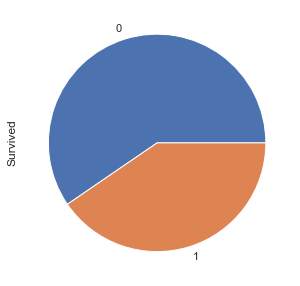

In [4]:
cleanedData.Survived.value_counts().plot(kind = 'pie',y = "Survived", figsize=(5, 5))

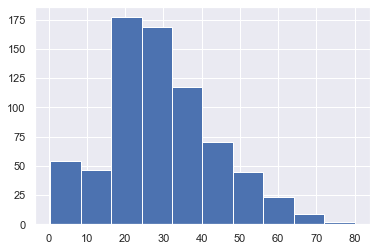

In [5]:
cleanedData.Age.hist()

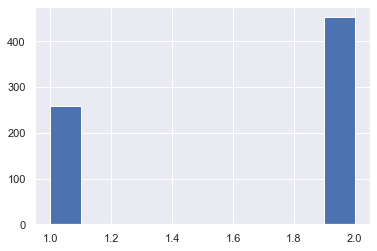

In [6]:
cleanedData.Sex.hist()

In this plot we see that there looks like a positive trend for survival and fare rate. But it looks one person paid a excessive amount of money and survived which could throw off our cleanedData, So i removed the people who's fare price was over 3 standard deviations away. which shows that people who paid more generally had a better chance of survival

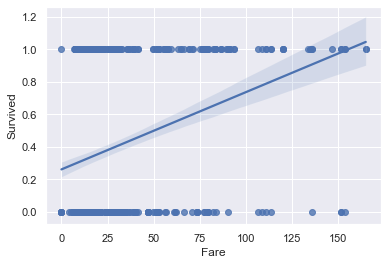

In [7]:
zscores = stats.zscore(cleanedData.Age)
z = stats.zscore(cleanedData["Fare"])
removeOutlier = cleanedData.copy()
removeOutlier['filtered'] = (z < 3)
removeOutlier = removeOutlier.loc[removeOutlier.filtered,:]
removeOutlier.drop('filtered', axis = 1)
removeOutlier.reset_index
sns.regplot(x = "Fare", y = "Survived", data = removeOutlier )

In [8]:
cleanedData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",2,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",2,26.0,0,0,111369,30.0000,C


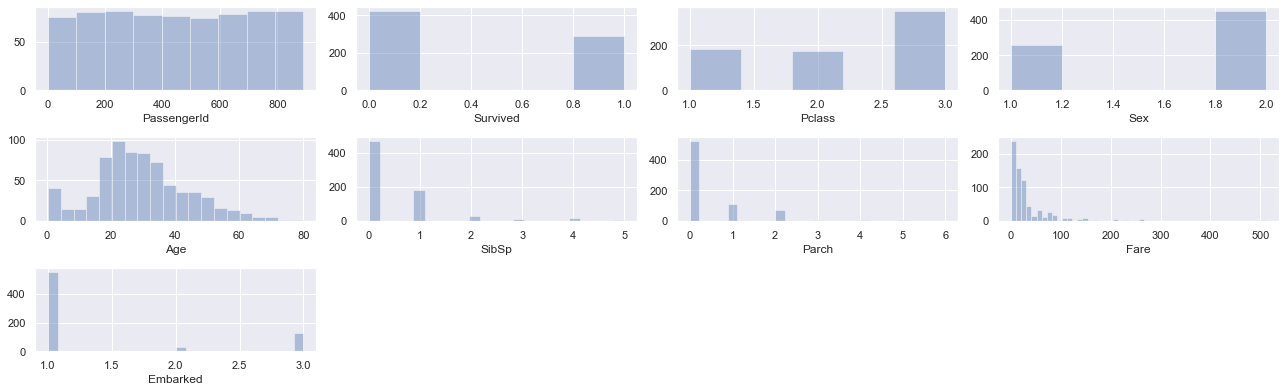

In [19]:
fig = plt.figure(figsize=(18,16))
IntData = cleanedData
IntData=IntData.drop(["Name", "Ticket",], axis =1)
IntData["Embarked"] = IntData["Embarked"].map({"S":1, "Q":2, "C":3})
for index,col in enumerate(IntData):
    plt.subplot(9,4,index+1)
    sns.distplot(IntData.loc[:,col].dropna(), kde=False)
fig.tight_layout(pad=1.0)
#I got the basics for this code from https://www.kaggle.com/angqx95/data-science-workflow-v2-top-2 
#I thought it was an interesting set of graphs and wanted to try  to replicate it to understand what he was doing 

In [23]:
IntData["Survived"].corr(IntData["Age"], method='pearson')

-0.08244586804341388